## Plotting Land Precipitation Monthly Mean

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [3]:
path = '/home/nblancoa/clim_680_dataset//'
fname = 'precip.mon.mean.2.5x2.5.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 908)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-08-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          Precipitation Reconstruction over Land (PREC/L): 2.5x2.5
    platform:       Analyses
    institution:    NOAA ESRL/PSD
    citation:       Chen, M., P. Xie, J. E. Janowiak, and P. A. Arkin, 2002: ...
    history:        created 01/2011 by CAS\nConverted to chunked, deflated Ne...
    Conventions:    CF-1.2
    dataset_title:  Precipitation Reconstruction over Land (PREC/L)
    References:     http://www.psl.noaa.gov/data/gridded/data.precl.html
    data_modified:  2023-08-03

In [4]:
ds_mean=ds.mean(dim='time')

ds_mean

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    precip   (lat, lon) float32 nan nan nan nan ... 0.2874 0.2834 0.2793 0.2754

## Original Contour Plot

''

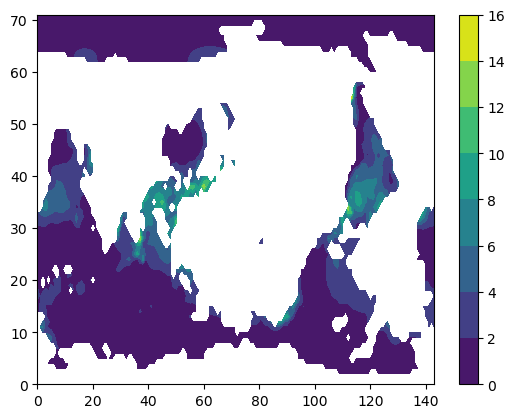

In [5]:
plt.contourf(ds_mean['precip'])
plt.colorbar() 
;

## Final Map 

''

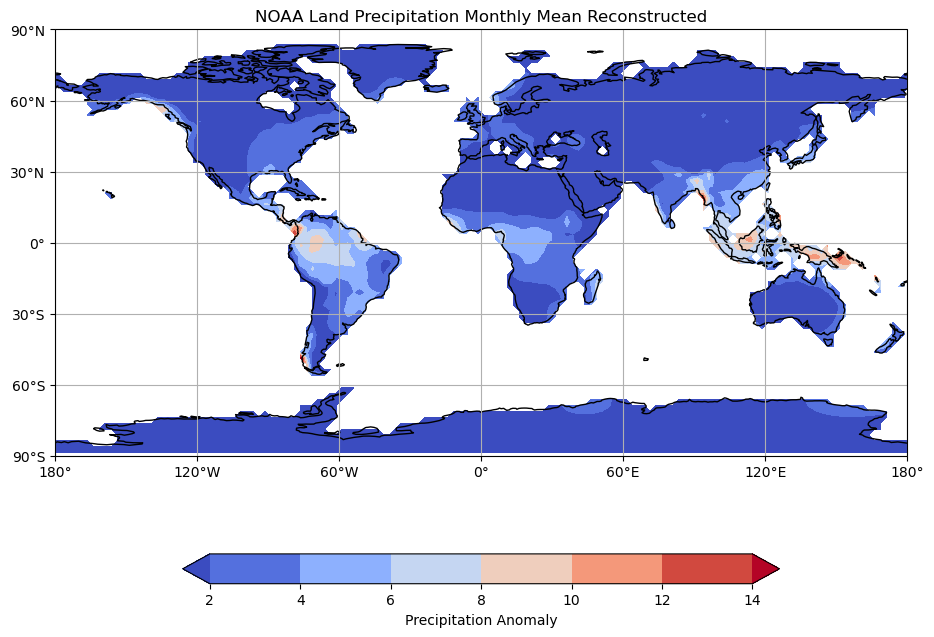

In [7]:
# Change the map projection and add titles.

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['precip']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation Anomaly')

# Add title
plt.title('NOAA Land Precipitation Monthly Mean Reconstructed')
;